In [1]:
# Dependencies and Setup
# SQL Alchemy
from sqlalchemy import create_engine

# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

# NumPy
import numpy as np

#config
from config import database_uri 


In [2]:

engine = create_engine(database_uri)
conn = engine.connect()

In [3]:
# Query All Records in the Salaries Table
salaries_data = pd.read_sql("SELECT * FROM salaries",conn) 
salaries_data.head()

,emp_id,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [4]:
# Query All Records in the Titles Table
titles_data = pd.read_sql("SELECT * FROM titles", conn)
titles_data.head()

,emp_id,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [5]:
#Merging Salaries and Title with emp_id as a join
combined_date = pd.merge(salaries_data,titles_data , how = 'inner',on ='emp_id')
combined_date.head()

,emp_id,salary,from_date_x,to_date_x,title,from_date_y,to_date_y
0,10001,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,65828,1996-08-03,1997-08-03,Staff,1996-08-03,9999-01-01
2,10003,40006,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,9999-01-01
3,10004,40054,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01
4,10004,40054,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,9999-01-01


In [6]:
#Grouping titles 
group_by_title = combined_date.groupby("title").mean()
group_by_title.head()


,emp_id,salary
title,,
Assistant Engineer,251495.398533,48493.204786
Engineer,252943.159987,48539.781423
Manager,110780.833333,51531.041667
Senior Engineer,253034.375949,48506.751806
Senior Staff,253423.367183,58503.286614


In [7]:
#droping emp_id from the data frame 
salary_mean = group_by_title.drop(columns = 'emp_id')
salary_mean.head()

,salary
title,
Assistant Engineer,48493.204786
Engineer,48539.781423
Manager,51531.041667
Senior Engineer,48506.751806
Senior Staff,58503.286614


In [8]:
#creating a bar chart 
#salary_mean.plot.bar(y='salary')

In [9]:
# Reset Index
salary_mean = salary_mean.reset_index()
salary_mean.head()

,title,salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614


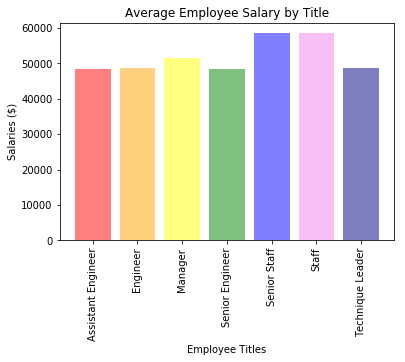

In [14]:
#creating a neat/organized bar graph 
career = salary_mean["title"]
ticks = np.arange(len(career))
salary = salary_mean["salary"]

# Create Bar Chart Based on Above Data
plt.bar(career, salary, align="center", alpha=0.5, color=["red", "orange", "yellow", "green", "blue", "violet", "navy"])

# Create Ticks for Bar Chart's x_axis
plt.xticks(ticks, career, rotation="vertical")

# Set Labels & Title
plt.ylabel("Salaries ($)")
plt.xlabel("Employee Titles")
plt.title("Average Employee Salary by Title")


# Show plot
plt.show()
